<a href="https://colab.research.google.com/github/BrunoHznd/MachineLearning/blob/Teste1/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim


In [ ]:
transform = transforms.ToTensor()

trainset = datasets.MNIST('MNIST_data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valset = datasets.MNIST('MNIST_data/', train=False, download=True, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

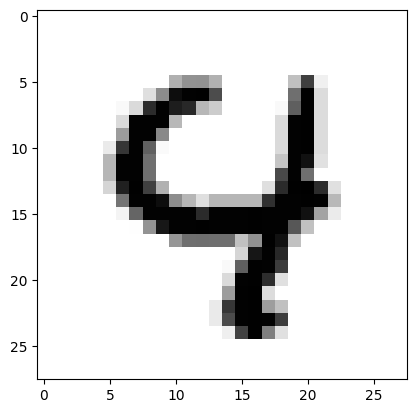

In [ ]:
#lendo Imagem do dataset

dataiter = iter(trainloader)
imagens, etiquetas = next(dataiter)

plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');


In [ ]:
#Verificar as dimensoes do tensor de cada imagem
print(imagens[0].shape)
#VVerificar dimensoes do tensor de cada etiqueta
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.linear = nn.Linear(26 * 28, 128)
        self.linear = nn.Linear(128, 64)
        self.linear = nn.Linear(64, 10)

    def forward(self, x):
      x = F.relu(self.linear1(x))
      x = F.relu(self.linear2(x))
      x = self.linear3(x)
      return F.log_softmax(x, dim=1)


def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5)
  inicio = time()

  criterio = nn.CrossEntropyLoss()
  EPOCH = 10
  modelo.Train()

  for epoch in range(EPOCH):
    imagens - imagens.view(imagens.shape[0] - 1)
    otimizador.zero_grad()
    output = modelo(imagens.to(device))
    perda_instatanea = criterio(output, etiquetas.to(device))
    perda_instatanea.backward()
    otimizador.step()
    perda_acumulada += perda_instatanea.item()

In [ ]:
def validacao(modelo, valloader, device):
  conta_corretas, conta_totais = 0, 0

  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img = imagens[i].view(1, 784)
      with torch.no_grad():
        logps = modelo(img.to(device))

      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index(max(probab))
      etiqueta_certa = etiquetas.numpy()[i]

      if(etiqueta_certa == etiqueta_pred):
        conta_corretas += 1
      conta_todas += 1

    print("Totais de imagens testadas: ", conta_todas)
    print("\nPrecissão: " .format(conta_corretas*100/conta_totais))

In [ ]:
#Verifica se o CUDA esta disponivel
modelo = Modelo()
device = torch.device("CUDA" if torch.cuda.is_available() else "cpu")
modelo.to(device)


Modelo(
  (linear): Linear(in_features=64, out_features=10, bias=True)
)